# Assignment 18 Forecasting
## Dataset : CocaCola_Sales_Rawdata

#### Info. about Forecasting
Forecasting is a technique that uses historical data as inputs to make informed estimates that are predictive in determining the direction of future trends. Businesses utilize forecasting to determine how to allocate their budgets or plan for anticipated expenses for an upcoming period of time. This is typically based on the projected demand for the goods and services offered.

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

### Dataset Loading

In [2]:
CocaCola_Sales_Rawdata = pd.read_excel("D:\Data Science Material\Assignments\Forecasting\CocaCola_Sales_Rawdata.xlsx")

In [3]:
CocaCola_Sales_Rawdata.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### Exploring the dataset

In [4]:
# some mathematical caculation

CocaCola_Sales_Rawdata.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
# lets explore about the data types, null cols, dataset length, rows and columns

CocaCola_Sales_Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
CocaCola_Sales_Rawdata.shape

(42, 2)

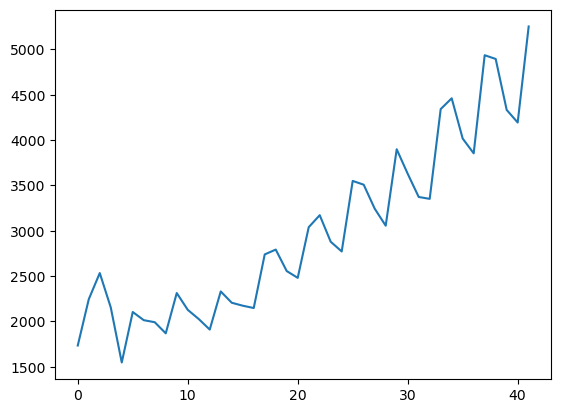

In [7]:
CocaCola_Sales_Rawdata.Sales.plot()
plt.show()

This following Upward linear trend with multiplicative seasonality

### Data Analysis

In [8]:
# finding NA values null values

CocaCola_Sales_Rawdata.isna().sum()

Quarter    0
Sales      0
dtype: int64

No. Na \ null values present the dataset

## making the dataset safe

In [9]:
# making the dataset safe

CocaCola_Sales = CocaCola_Sales_Rawdata.copy()

In [10]:
CocaCola_Sales.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### Converting the data into quarters and years

In [11]:
CocaCola_Sales['Quarters']= 0
CocaCola_Sales['Year'] = 0
for i in range(42):
    p = CocaCola_Sales["Quarter"][i]
    CocaCola_Sales['Quarters'][i]= p[0:2]
    CocaCola_Sales['Year'][i]= p[3:5]

<ipython-input-11-15a62d16d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CocaCola_Sales['Quarters'][i]= p[0:2]
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-11-15a62d16d280>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CocaCola_Sales['Year'][i]= p[3:5]


In [12]:
CocaCola_Sales.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


### Creating dummies

In [13]:
Quarters_Dummies = pd.get_dummies(CocaCola_Sales['Quarters'])
CocaCola_Sales = pd.concat([CocaCola_Sales,Quarters_Dummies],axis = 1)

In [14]:
#Quarters = pd.get_dummies(CocaCola_Sales['Quarters'],drop_first = True)

In [15]:
#CocaCola_Sales = pd.concat([CocaCola_Sales,Quarters],axis = 1)

In [16]:
CocaCola_Sales.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


### Creating variable columns for model creation

In [17]:
CocaCola_Sales.shape

(42, 8)

In [18]:
CocaCola_Sales["t"] = np.arange(1,43)
CocaCola_Sales["t_squared"] = CocaCola_Sales["t"] * CocaCola_Sales["t"]
CocaCola_Sales.columns
CocaCola_Sales["log_Sales"] = np.log(CocaCola_Sales["Sales"])
CocaCola_Sales.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


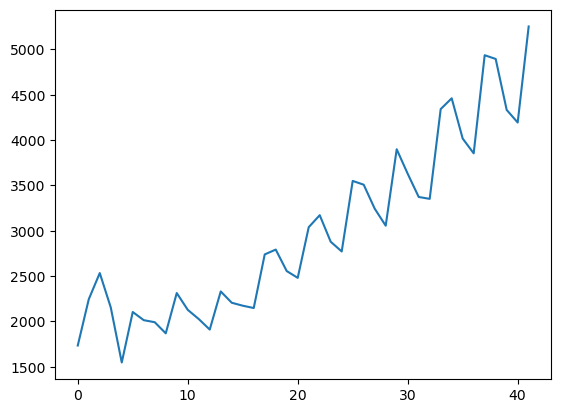

In [19]:
CocaCola_Sales.Sales.plot()
plt.show()

### From the above we can see that it is following Upward linear trend with multiplicative seasonality

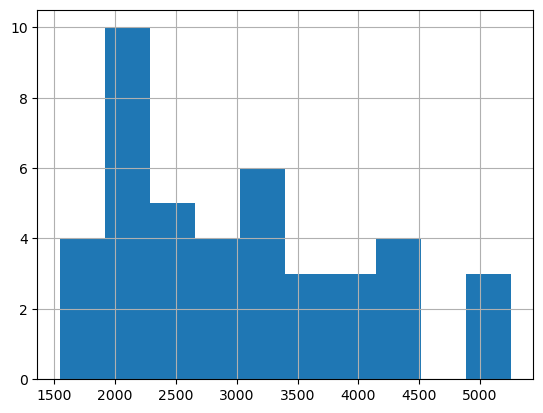

In [20]:
CocaCola_Sales.Sales.hist()
plt.show()

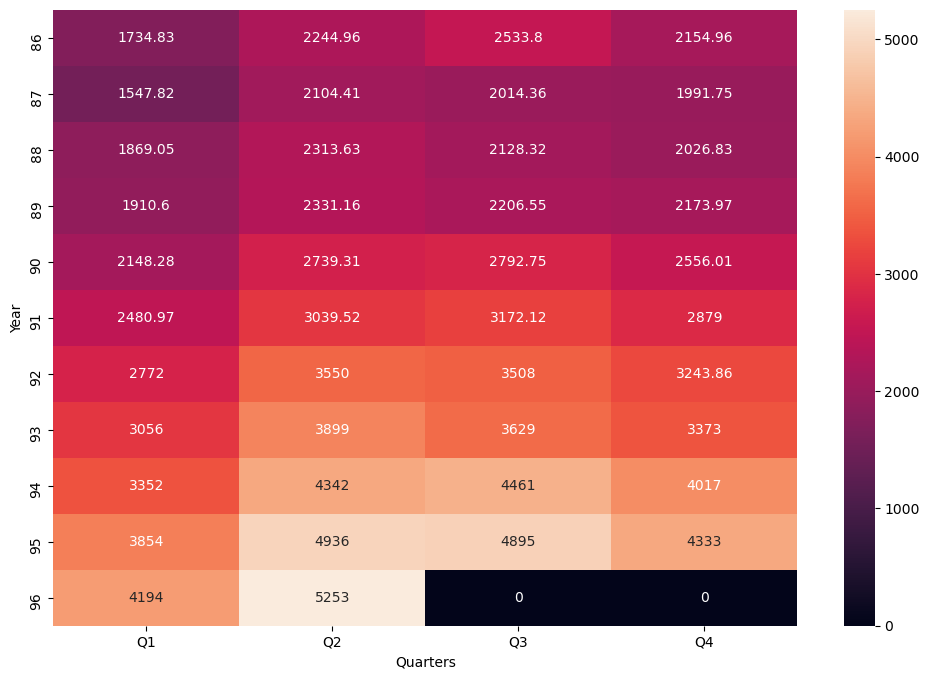

In [21]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=CocaCola_Sales,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

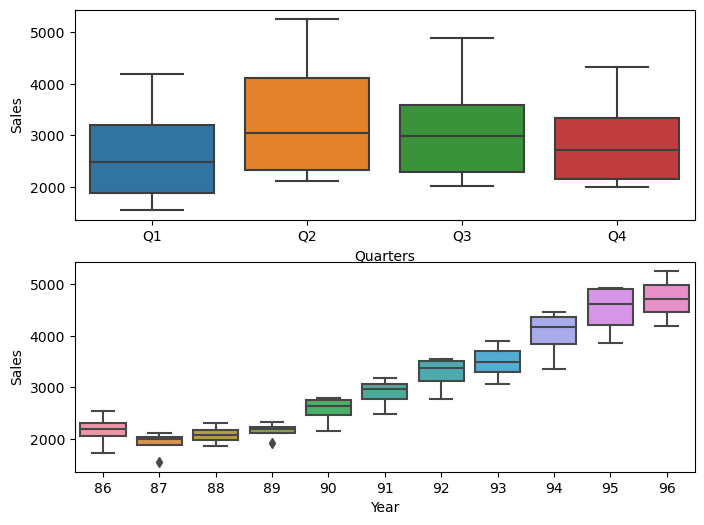

In [22]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=CocaCola_Sales)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=CocaCola_Sales)
plt.show()

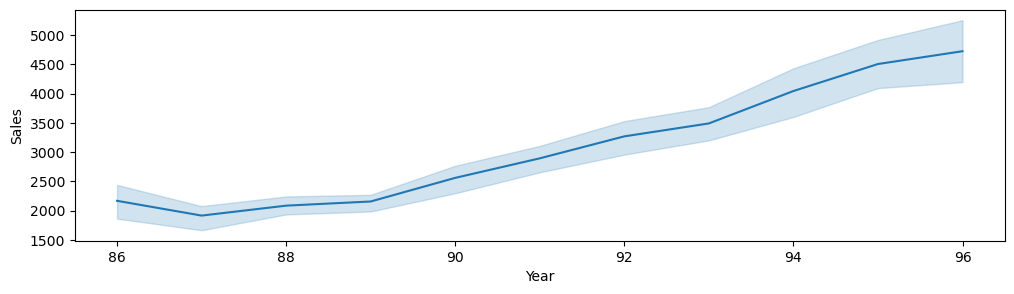

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=CocaCola_Sales)
plt.show()

### Splitting Data 

In [24]:
CocaCola_Sales.shape

(42, 11)

In [25]:
CocaCola_Sales.head(1)

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827,Q1,86,1,0,0,0,1,1,7.458663


In [26]:
Train = CocaCola_Sales.head(32)
Test = CocaCola_Sales.tail(10)

### Linear Model

In [27]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767115

### Exponential

In [28]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


590.3316432076576

### Quadratic

In [29]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554072897

### Additive seasonality

In [30]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

### Additive Seasonality Quadratic 

In [31]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1850.4665461858358

### Multiplicative Seasonality

In [32]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948361168

### Multiplicative Additive Seasonality

In [33]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.8678182691964

### Compare the results 

In [34]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,448.867818
2,rmse_Quad,457.735736
1,rmse_Exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
4,rmse_add_sea_quad,1850.466546
5,rmse_Mult_sea,1908.250395


### Predict for new time period

In [35]:
CocaCola_Sales.head(1)

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827,Q1,86,1,0,0,0,1,1,7.458663


In [36]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = CocaCola_Sales).fit()

In [37]:
pred_new  = pd.Series(Mul_Add_sea.predict(CocaCola_Sales))
np.exp(pred_new).head()

0    1539.516800
1    1958.133190
2    1941.716476
3    1792.297460
4    1695.770302
dtype: float64

In [38]:
CocaCola_Sales["forecasted_Sales"] = pd.Series(pred_new)

In [39]:
CocaCola_Sales

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,7.339224
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,7.579747
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,7.571328
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,7.491254
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,7.435892
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,7.676415
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,7.667996
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,7.587922
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,7.532561
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,7.773084


### Multiplicative Additive Seasonality model is the best model for forecasting with 
### lowest RMSE value i.e 448.86

## Data Driven Model

In [40]:
CocaCola_Sales.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,7.339224
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,7.579747
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,7.571328
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,7.491254
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,7.435892


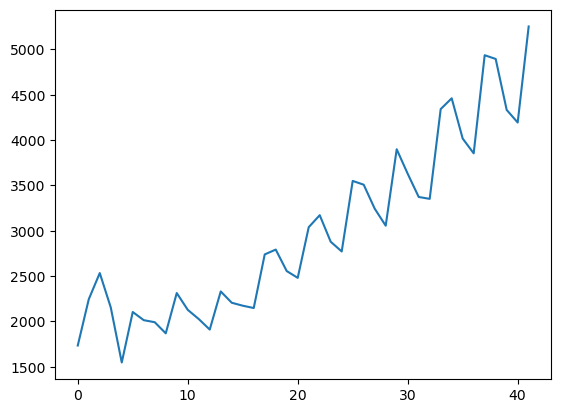

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,7.339224
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,7.579747
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,7.571328
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,7.491254
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,7.435892
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,7.676415
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,7.667996
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,7.587922
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,7.532561
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,7.773084


In [41]:
CocaCola_Sales.Sales.plot()
plt.show()
CocaCola_Sales

### Moving average

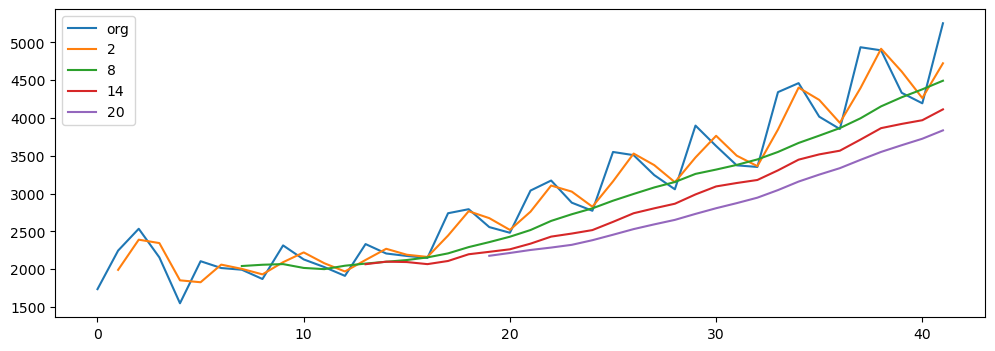

In [42]:
plt.figure(figsize=(12,4))
CocaCola_Sales.Sales.plot(label="org")
for i in range(2,24,6):
    CocaCola_Sales["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### Time Series decomposition plot

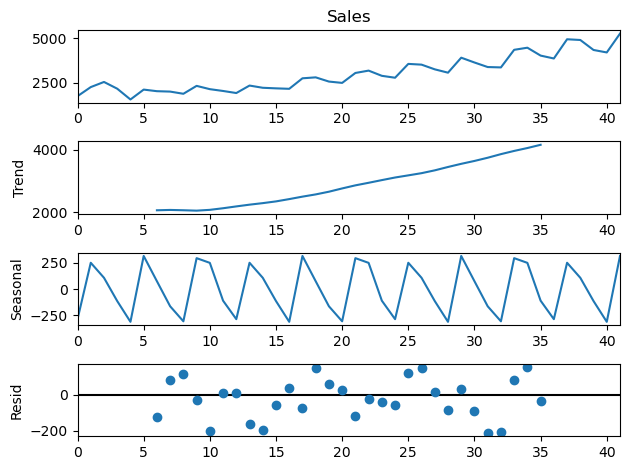

In [43]:
decompose_ts_add = seasonal_decompose(CocaCola_Sales.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

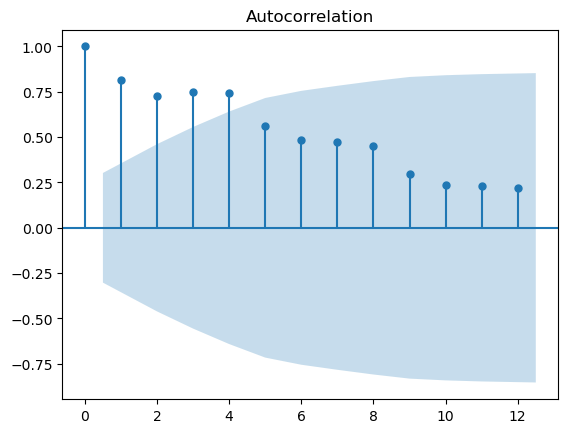

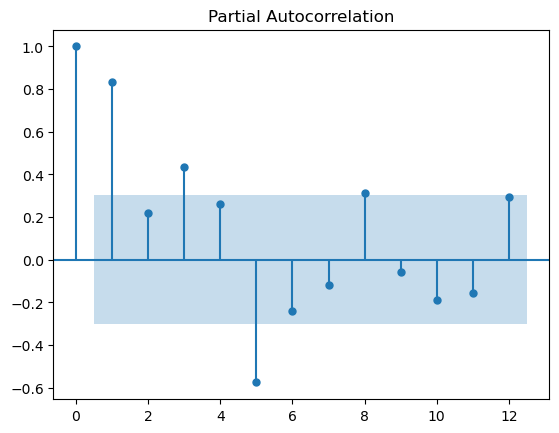

In [44]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(CocaCola_Sales.Sales,lags=12)
tsa_plots.plot_pacf(CocaCola_Sales.Sales,lags=12)
plt.show()

### Evaluation Metric MAPE

In [45]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [46]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.724051812293908

### Holt method 

In [47]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

<ipython-input-47-8b6f962a88ff>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


16.720651186614596

### Holts winter exponential smoothing with additive seasonality and additive trend

In [48]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

12.285893632531486

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [49]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

6.7786245949093855

### Final Model by combining train and test

In [50]:
hwe_model_add_add = ExponentialSmoothing(CocaCola_Sales["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [51]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    4952.179130
43    4770.339808
44    4799.559682
45    5674.370110
46    5710.387064
47    5287.030513
48    5162.798355
49    6119.518265
50    6004.894163
51    5538.624650
dtype: float64

## Holts winter exponential smoothing with multiplicative seasonality and additive trend model is the best for forecasting 
## because its RMSE value is : 6.77 which is very less 